In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import scipy.stats as stats

In [2]:
start = datetime.strptime('2023-01-01', '%Y-%m-%d')
end = datetime.strptime('2025-12-13', '%Y-%m-%d')
ticker_1="NVDA"
ticker_2="HOOD"

asset_1 = yf.download(ticker_1, start, end)
asset_2 = yf.download(ticker_2, start, end)

/var/folders/ld/dg7bxfjj6qq8l_c9ht4pn_fw0000gn/T/ipykernel_68747/2909325263.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  asset_1 = yf.download(ticker_1, start, end)
[*********************100%***********************]  1 of 1 completed
/var/folders/ld/dg7bxfjj6qq8l_c9ht4pn_fw0000gn/T/ipykernel_68747/2909325263.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  asset_2 = yf.download(ticker_2, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
asset_1.tail()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2025-12-08,185.550003,188.000000,182.399994,182.639999,204378100
2025-12-09,184.970001,185.720001,183.320007,185.559998,144719700
2025-12-10,183.779999,185.479996,182.039993,184.970001,162785400
2025-12-11,180.929993,181.320007,176.619995,180.279999,182136600
2025-12-12,175.020004,182.820007,174.619995,181.259995,153892121


In [4]:
asset_2.tail()

Price,Close,High,Low,Open,Volume
Ticker,HOOD,HOOD,HOOD,HOOD,HOOD
Date,,,,,
2025-12-08,136.429993,138.089996,132.001999,134.100006,22593100
2025-12-09,135.710007,139.750000,133.570007,134.500000,18948200
2025-12-10,135.660004,137.460007,133.429993,135.259995,18232100
2025-12-11,123.379997,131.774994,122.529999,131.774994,44624800
2025-12-12,119.500000,125.650002,117.834999,125.260002,31272939


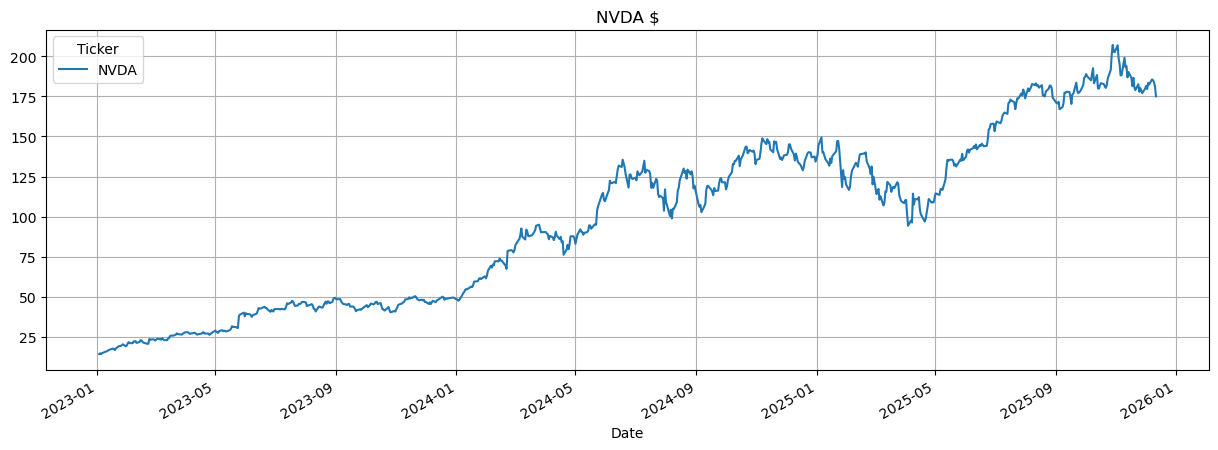

In [5]:
asset_1["Close"].plot(figsize=(15,5), title = "{} $".format(ticker_1))
plt.grid(True)

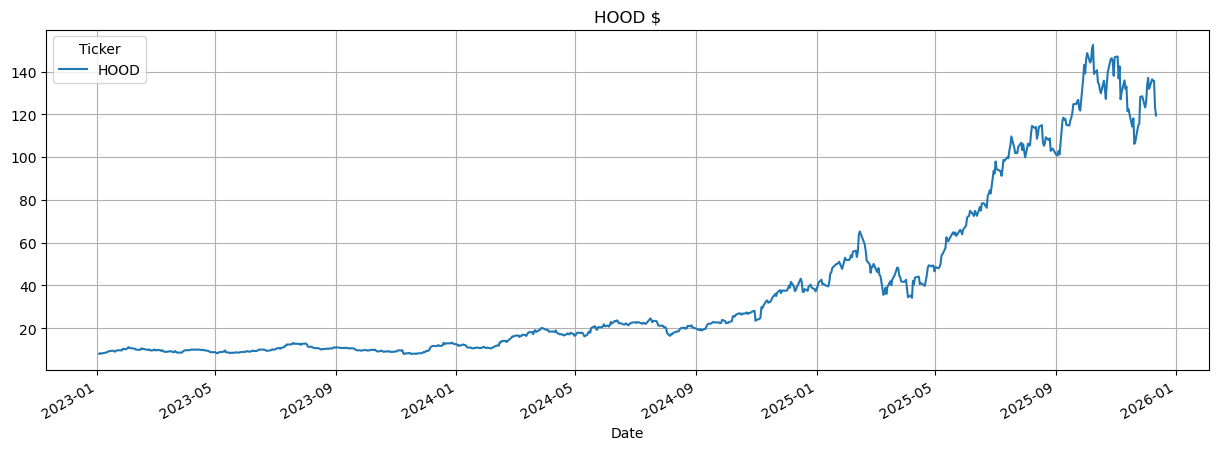

In [6]:
asset_2["Close"].plot(figsize=(15,5), title = "{} $".format(ticker_2))
plt.grid(True)

In [7]:
data = pd.concat([asset_1["Close"], asset_2["Close"]],axis=1).dropna()
data.columns = [ticker_1, ticker_2]
N = len(data.columns)
data

,NVDA,HOOD
Date,,
2023-01-03,14.300685,8.080000
2023-01-04,14.734251,8.360000
2023-01-05,14.250734,8.110000
2023-01-06,14.844141,8.250000
2023-01-09,15.612371,8.550000
...,...,...
2025-12-08,185.550003,136.429993
2025-12-09,184.970001,135.710007
2025-12-10,183.779999,135.660004


In [8]:
log_rets = np.log(data/data.shift(1)).dropna()
log_rets

,NVDA,HOOD
Date,,
2023-01-04,0.029867,0.034067
2023-01-05,-0.033366,-0.030361
2023-01-06,0.040797,0.017115
2023-01-09,0.050458,0.035718
2023-01-10,0.017821,0.019688
...,...,...
2025-12-08,0.017067,0.033389
2025-12-09,-0.003131,-0.005291
2025-12-10,-0.006454,-0.000369


<Axes: ylabel='Density'>

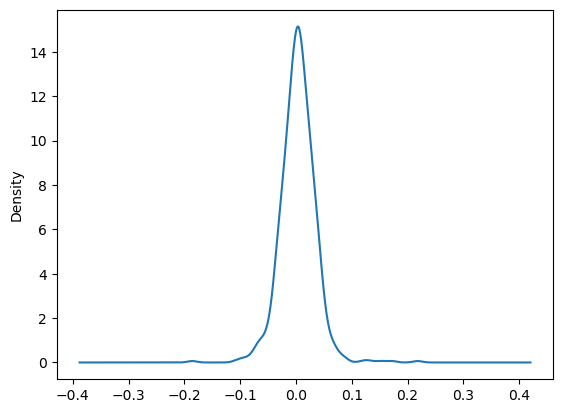

In [9]:
log_rets[ticker_1].plot(kind = "kde")

<Axes: ylabel='Density'>

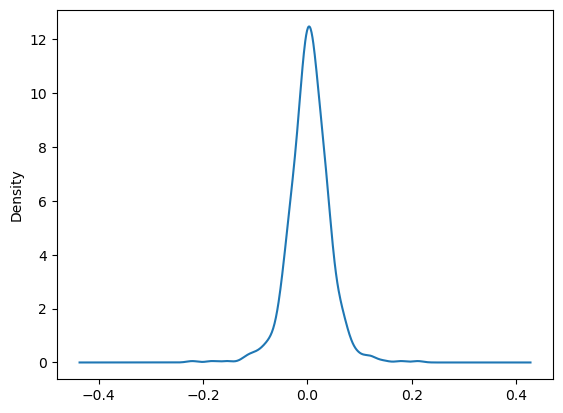

In [10]:
log_rets[ticker_2].plot(kind = "kde")

In [11]:
log_rets_cov = log_rets.cov()
log_rets_cov

,NVDA,HOOD
NVDA,0.000986,0.000494
HOOD,0.000494,0.001529


In [12]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights/ np.sum(weights)

$E[R_{p}] = w_{1}*E[R_{1}] + w_{2}*E[R_{2}] + w_{3}*E[R_{3}]$

In [13]:
def calculate_returns(weights,log_rets):
    return np.sum(log_rets.mean() * weights) * 252 #Annualized Returns

$Cov = \begin{bmatrix}
    var(R_{1}) & cov(R_{1}, R_{2}) & cov(R_{1}, R_{3}) \\
    cov(R_{2}, R_{1}) & var(R_{2}) & cov(R_{2}, R_{3}) \\
    cov(R_{3}, R_{1}) & cov(R_{3}, R_{2}) & var(R_{3})
    \end{bmatrix},
w = \begin{bmatrix}
    w_{1} \\
    w_{2} \\
    w_{3} \\
    \end{bmatrix}$
    
$Cov * w$

$ = \begin{bmatrix}
    var(R_{1}) & cov(R_{1}, R_{2}) & cov(R_{1}, R_{3}) \\
    cov(R_{2}, R_{1}) & var(R_{2}) & cov(R_{2}, R_{3}) \\
    cov(R_{3}, R_{1}) & cov(R_{3}, R_{2}) & var(R_{3})
    \end{bmatrix} *
    \begin{bmatrix}
    w_{1} \\
    w_{2} \\
    w_{3} \\
    \end{bmatrix}$

$ = \begin{bmatrix}
    w_{1} * var(R_{1}) + w_{2} * cov(R_{1}, R_{2}) + w_{3} * cov(R_{1}, R_{3}) \\
    w_{1} * cov(R_{2}, R_{1}) + w_{2} * var(R_{2}) + w_{3} * cov(R_{2}, R_{3}) \\
    w_{1} * cov(R_{3}, R_{1}) + w_{2} * cov(R_{3}, R_{2}) + w_{3} * var(R_{3})
    \end{bmatrix}$
    
$w^{T} * Cov * w$

$ = \begin{bmatrix}
    w_{1} & w_{2} & w_{3}
    \end{bmatrix} *
    \begin{bmatrix}
    var(R_{1}) & cov(R_{1}, R_{2}) & cov(R_{1}, R_{3}) \\
    cov(R_{2}, R_{1}) & var(R_{2}) & cov(R_{2}, R_{3}) \\
    cov(R_{3}, R_{1}) & cov(R_{3}, R_{2}) & var(R_{3})
    \end{bmatrix} *
    \begin{bmatrix}
    w_{1} \\
    w_{2} \\
    w_{3} \\
    \end{bmatrix}$
    
$ = \begin{bmatrix}
    w_{1} & w_{2} & w_{3}
    \end{bmatrix} *
    \begin{bmatrix}
    w_{1} * var(R_{1}) + w_{2} * cov(R_{1}, R_{2}) + w_{3} * cov(R_{1}, R_{3}) \\
    w_{1} * cov(R_{2}, R_{1}) + w_{2} * var(R_{2}) + w_{3} * cov(R_{2}, R_{3}) \\
    w_{1} * cov(R_{3}, R_{1}) + w_{2} * cov(R_{3}, R_{2}) + w_{3} * var(R_{3})
    \end{bmatrix}$
    
$ = w_{1}^{2} * var(R_{1}) + w_{1} * w_{2} * cov(R_{1}, R_{2}) + w_{1} * w_{3} * cov(R_{1}, R_{3}) + \\
    w_{2} * w_{1} * cov(R_{2}, R_{1}) + w_{2}^{2} * var(R_{2}) + w_{2} * w_{3} * cov(R_{2}, R_{3}) + \\
    w_{3} * w_{1} * cov(R_{3}, R_{1}) + w_{3} * w_{2} * cov(R_{3}, R_{2}) + w_{3}^{2} * var(R_{3})$
    
$ = w_{1}^{2} * var(R_{1}) + w_{2}^{2} * var(R_{2}) + w_{3}^{2} * var(R_{3}) + 2 * w_{1} * w_{2} * cov(R_{1}, R_{2}) + 2 * w_{1} * w_{3} * cov(R_{1}, R_{3}) + 2 * w_{2} * w_{3} * cov(R_{2}, R_{3})$

$\sigma_{p} = \sqrt{w^{T} * Cov * w}$

$ = \sqrt{w_{1}^{2} * var(R_{1}) + w_{2}^{2} * var(R_{2}) + w_{3}^{2} * var(R_{3}) + 2 * w_{1} * w_{2} * cov(R_{1}, R_{2}) + 2 * w_{1} * w_{3} * cov(R_{1}, R_{3}) + 2 * w_{2} * w_{3} * cov(R_{2}, R_{3})}$

In [14]:
def calculate_volatility(weights, log_rets_cov):
    annualized_cov = np.dot(log_rets_cov * 252, weights)
    vol = np.dot(weights.transpose(), annualized_cov)
    return np.sqrt(vol)

In [15]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(10000):
    weights = gen_weights(N)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights, log_rets))
    mc_portfolio_vol.append(calculate_volatility(weights, log_rets_cov))

In [16]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

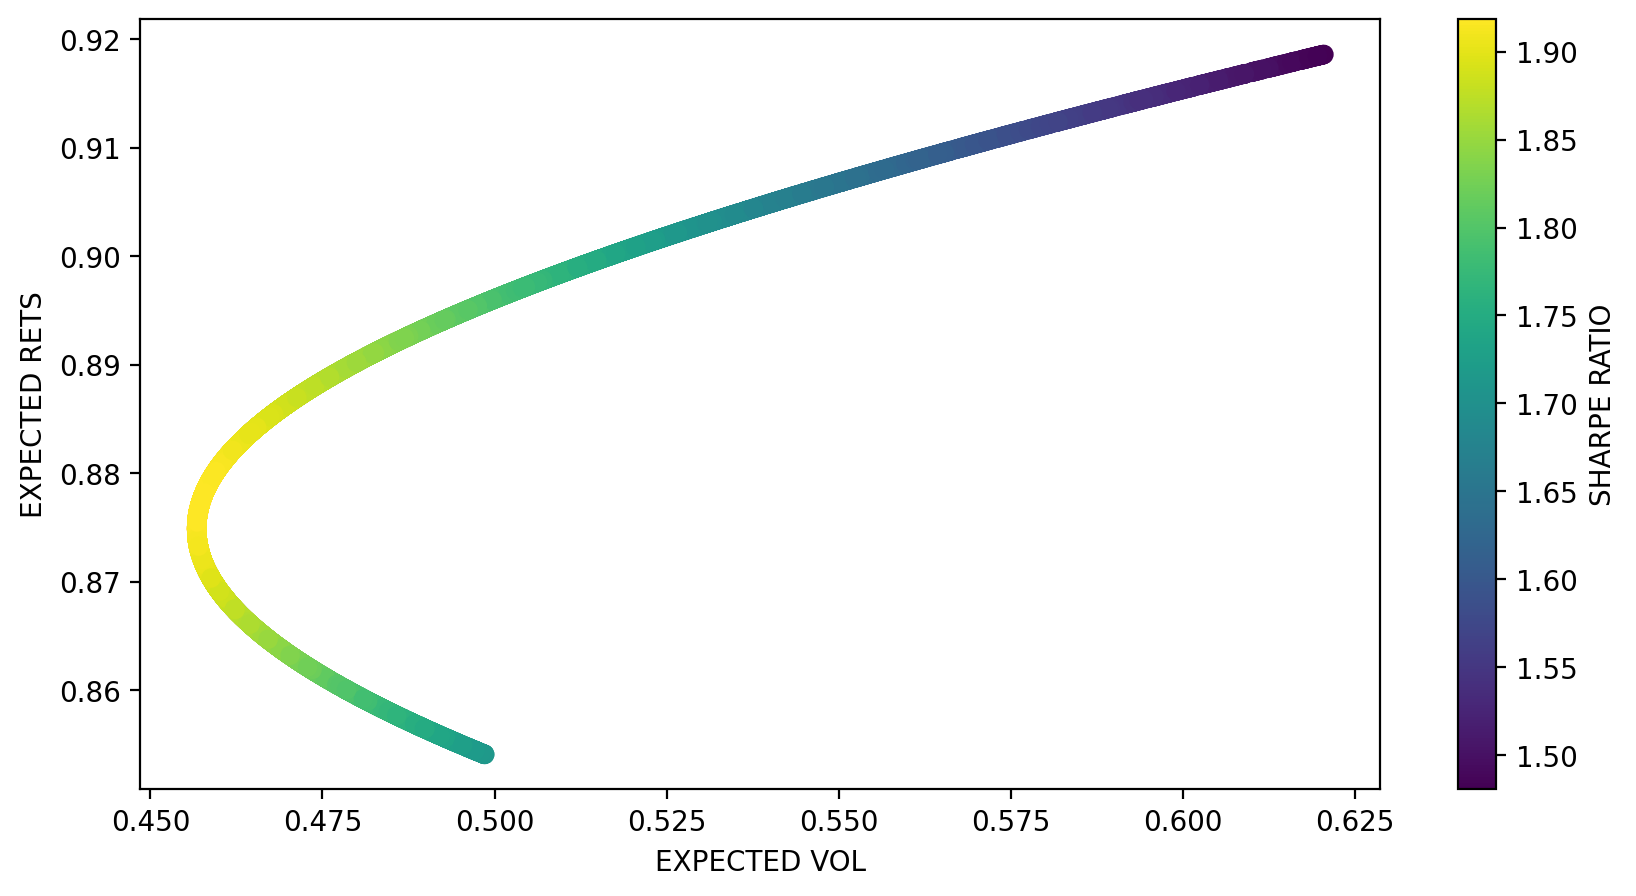

In [17]:
plt.figure(dpi=200,figsize=(10,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.ylabel('EXPECTED RETS')
plt.xlabel('EXPECTED VOL')
plt.colorbar(label="SHARPE RATIO");

In [18]:
optimized_portfolio_weights=["{:.2%}".format(w) for w in mc_weights[np.argmax(mc_sharpe_ratios)]]

In [19]:
print("From {} to {}".format(start.date(), end.date()))
print("{}:{}".format(ticker_1, optimized_portfolio_weights[0]))
print("{}:{}".format(ticker_2, optimized_portfolio_weights[1]))

From 2023-01-01 to 2025-12-13
NVDA:63.76%
HOOD:36.24%


In [20]:
from scipy.optimize import minimize

In [21]:
def function_to_minimize(weights):
    return -1 * (calculate_returns(weights,log_rets)/calculate_volatility(weights,log_rets_cov))

In [22]:
equal_weights = N * [1/N]
bounds = tuple((0,1) for n in range(N))
sum_constraint = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1})

In [23]:
minimize(fun = function_to_minimize, x0 = equal_weights, bounds = bounds, constraints = sum_constraint)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.9183913024937975
       x: [ 6.376e-01  3.624e-01]
     nit: 4
     jac: [ 1.773e-06 -3.129e-06]
    nfev: 12
    njev: 4

In [24]:
expected_returns_range = np.linspace(0.45,0.47,100)

In [25]:
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1},
               {'type':'eq','fun': lambda weights: calculate_returns(weights,log_rets) - possible_return})

In [26]:
# redefine calculate_volatility because scipy.optimize.minimize
# only takes one input (weights) for now 

def calculate_volatility(weights):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [27]:
frontier_volatility = []
for possible_return in expected_returns_range:
    result = minimize(calculate_volatility, equal_weights, bounds = bounds, constraints = constraints)
    frontier_volatility.append(result['fun'])

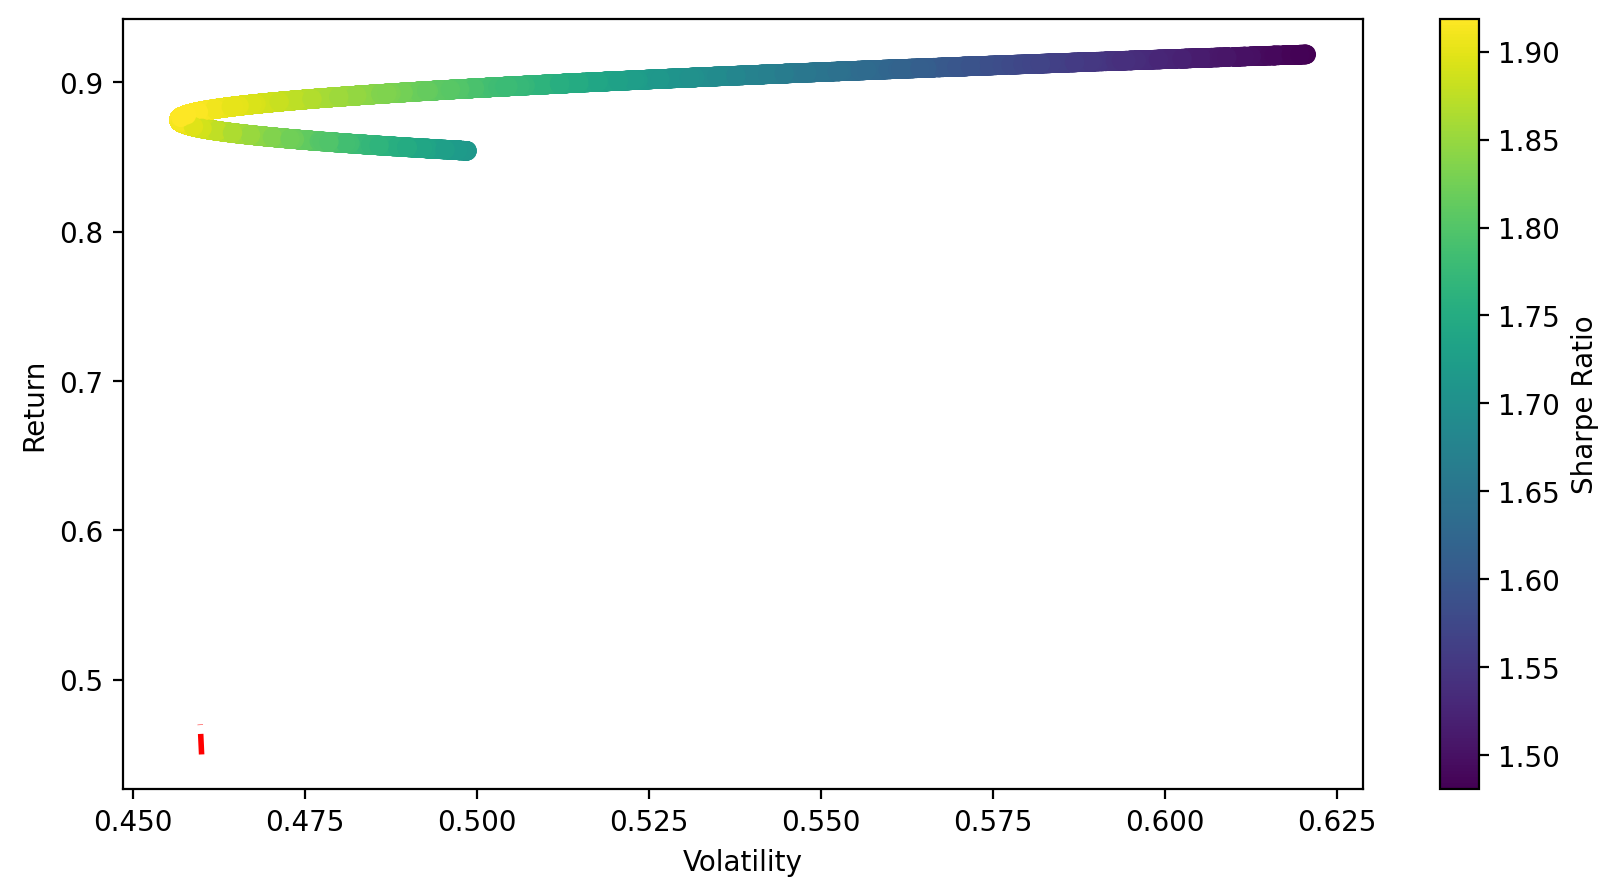

In [28]:
plt.figure(dpi=200,figsize=(10,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_volatility,expected_returns_range,'r--',linewidth=2)